In [70]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [71]:
ratings = pd.read_csv('../../Dataset/ml-latest-small/ratings.csv')
movies = pd.read_csv('../../Dataset/ml-latest-small/movies.csv')

In [72]:
#one hot encode
genres = movies['genres'].str.get_dummies('|')

genres.drop(columns=['(no genres listed)', 'Film-Noir', 'IMAX', 'Musical', 'Western', 'War'] ,axis=1, inplace=True)
genres
movies = pd.concat([movies, genres], axis=1)

In [73]:
pattern = '\((\d{4})\)'
movies['year'] = movies.title.str.extract(pattern, expand=False)


In [74]:
#finding movieid's has null values
null_ids = movies[movies['year'].isnull()]['movieId']
null_ids = pd.DataFrame(null_ids)
#dataframe  has null movieids
null_ids
null_id_array = null_ids['movieId'].values
#array has null movieids
null_id_array

#we got the years of the movies manually from internet and we need to merge it with movies dataset
years_of_null_movies = ["1994", "2018", "2015", "1979", "2016", "2016", "2016", "2016", "2019", "2017", "2006", "2017", "2011"]
null_ids['year'] = years_of_null_movies

null_ids

#filled movies df's year columns with the values that we found manually
movies['year'] = movies['year'].fillna(null_ids['year'])
movies['year'] = pd.to_numeric(movies['year'])

C:\Users\Burak\AppData\Local\Temp\ipykernel_3516\1893151335.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  ax1.plot(movieId_groupby_year.year.first(), movieId_groupby_year.movieId.nunique(), "g-o", c='lightpink')


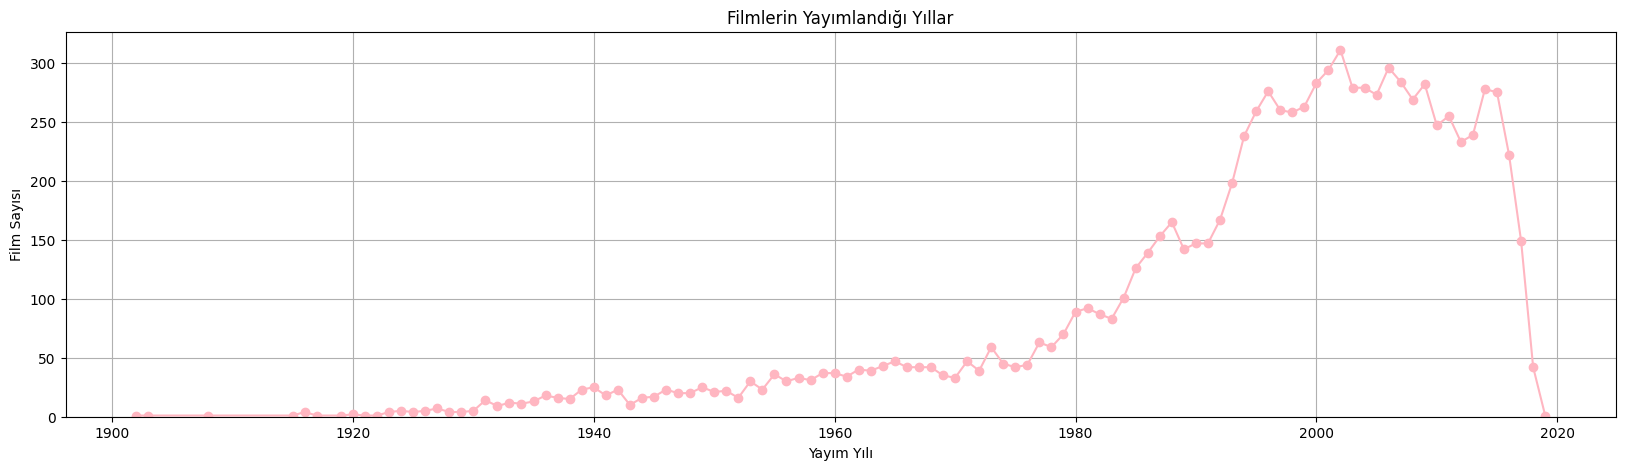

In [75]:
# 1990'lara kadar neredeyse üstel olarak artmış. 3 yıl duraksadıktan sonra daha da hızlı bir artış olmuş. her yıl çıkan 
# film sayısı genel olarak gittikçe artmış
# en çok film 2002'de çıkmış 
movieId_groupby_year = movies[['movieId', 'year']].groupby('year')

fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(movieId_groupby_year.year.first(), movieId_groupby_year.movieId.nunique(), "g-o", c='lightpink')
ax1.grid(None)
ax1.set_ylim(0,)
plt.xlabel("Yayım Yılı")
plt.ylabel("Film Sayısı")
plt.title("Filmlerin Yayımlandığı Yıllar")
plt.show()

In [76]:
#türleri ayıralım
def splitDataFrameList(df,target_column,separator):

    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

df_movies_genres = splitDataFrameList(movies,"genres","|")

In [77]:
genres_counts = df_movies_genres['genres'].value_counts()
genres_counts

genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64

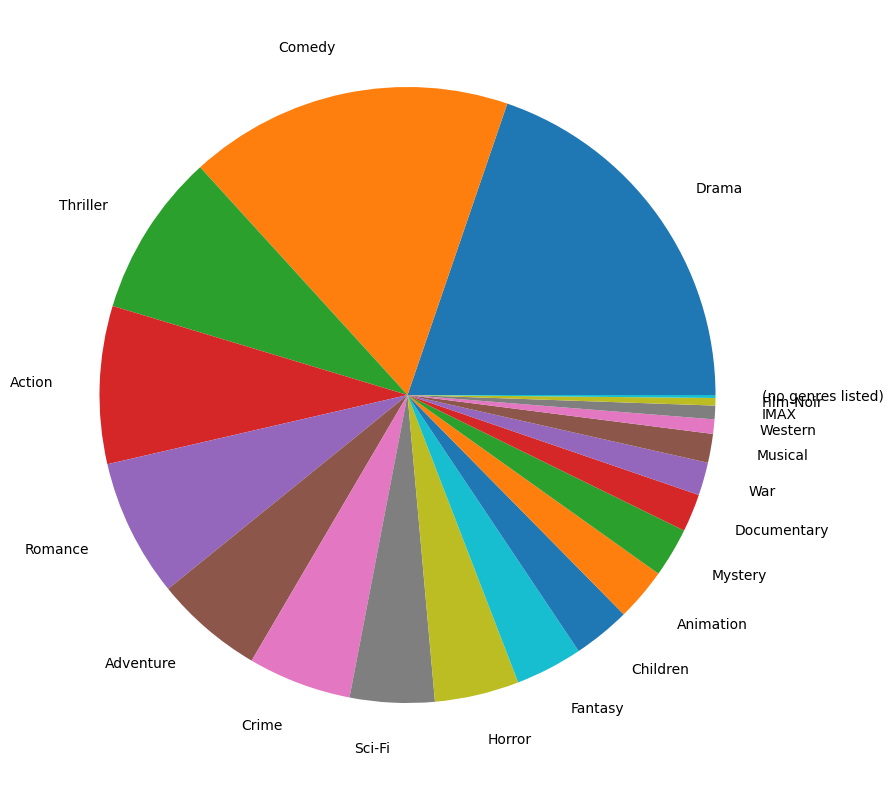

In [78]:
# en çok filme sahip olan tür dram
# açık ara en çok filme sahip olan 2 tür var. dram ve komedi
plt.figure(figsize=(10,10))
plt.pie(genres_counts, labels=genres_counts.index, labeldistance=1.15)
plt.show()

<Axes: title={'center': 'Film Türlerinin Dağılımı'}, xlabel='genres'>

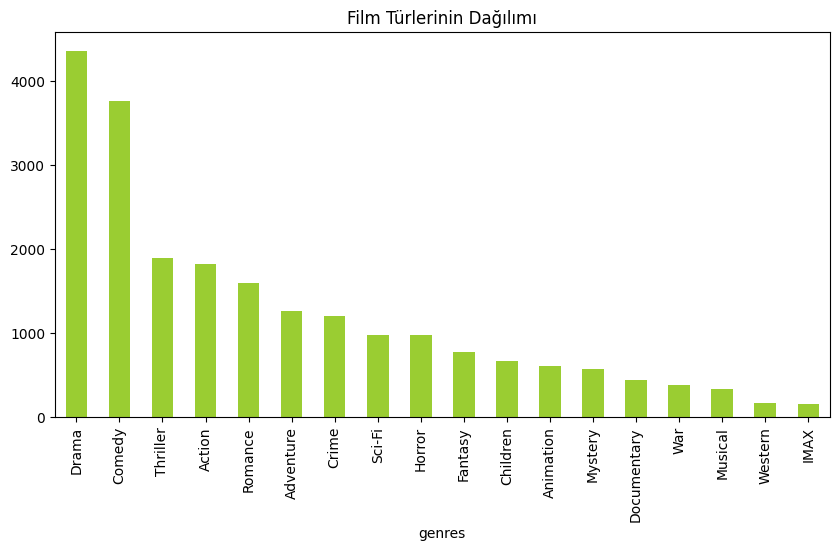

In [79]:
genres_counts[:18].plot(kind='bar', figsize=(10,5), color='yellowgreen',title="Film Türlerinin Dağılımı")

In [80]:
movies["age"] = 2023 - movies["year"]
movies.head()

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller,year,age
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1995,28
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1995,28
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1995,28
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1995,28
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1995,28


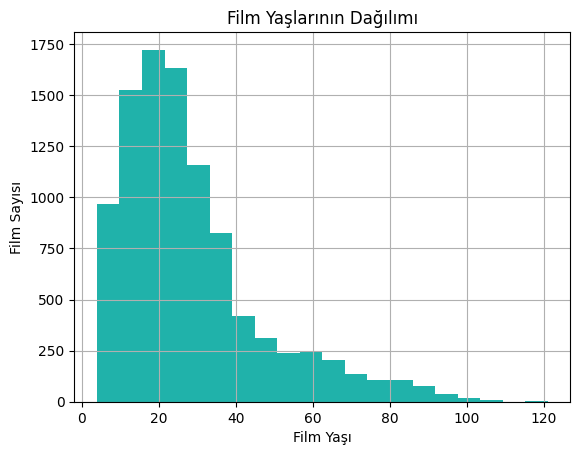

In [81]:
#çoğu filmin yaşı 20-30 arasında
movies["age"].hist(bins=20, color='lightseagreen')
plt.xlabel('Film Yaşı')
plt.ylabel('Film Sayısı')
plt.title('Film Yaşlarının Dağılımı')
plt.show()

In [82]:
#ortalama oy sayısını bulalım
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.rename(columns={'rating':'avg_rating'}, inplace=True)
ratings = ratings.merge(average_rating, on='movieId', how='inner')
ratings.head(5)

,userId,movieId,rating,timestamp,avg_rating
0,1,1,4.0,964982703,3.92093
1,5,1,4.0,847434962,3.92093
2,7,1,4.5,1106635946,3.92093
3,15,1,2.5,1510577970,3.92093
4,17,1,4.5,1305696483,3.92093


In [83]:
#oyun verildiği yılı bulalım
ratings_merge = ratings[['userId','movieId','rating']]
ratings['parsed_time'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.drop('timestamp', axis=1, inplace=True)
ratings['rating_year'] = pd.DatetimeIndex(ratings['parsed_time']).year
ratings.drop('parsed_time', axis=1, inplace=True)
ratings

,userId,movieId,rating,avg_rating,rating_year
0,1,1,4.0,3.92093,2000
1,5,1,4.0,3.92093,1996
2,7,1,4.5,3.92093,2005
3,15,1,2.5,3.92093,2017
4,17,1,4.5,3.92093,2011
...,...,...,...,...,...
100831,610,160341,2.5,2.50000,2016
100832,610,160527,4.5,4.50000,2016
100833,610,160836,3.0,3.00000,2017
100834,610,163937,3.5,3.50000,2017


In [84]:
#her filme kaç oy verildiğini bulalım. en çok oy verilen film 329 oyla forrest gump, daha sonra ise 317 oyla shawshank redemption
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.sort_values(by=['rating'], inplace=True, ascending=False)
movie_count = movie_count.merge(movies, on='movieId', how='inner')
movie_count[['movieId','title','rating']].head(5)

,movieId,title,rating
0,356,Forrest Gump (1994),329
1,318,"Shawshank Redemption, The (1994)",317
2,296,Pulp Fiction (1994),307
3,593,"Silence of the Lambs, The (1991)",279
4,2571,"Matrix, The (1999)",278


In [85]:
#oy ortalaması:3.50
#Min oy: 0.5, Max oy: 5
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

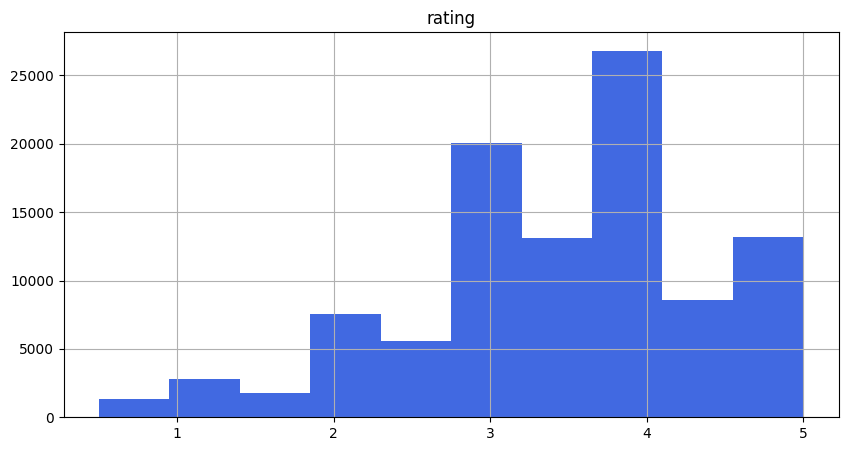

In [86]:
#oy dağılımı
#oylar 3 ve 4te yoğunlaşmış
#buçuklu oylar yerine tam oy vermek daha çok tercih edilmiş
#insanlaın daha çok yüksek oy verme eğiliminde olduğunu söyleyebiliriz
ratings.hist(column='rating', figsize=(10,5), color='royalblue')

In [87]:
#her kullanıcının kaç oy verdiğini bulalım
#en çok oy sayısına sahip olan kullanıcı 2698 oy vermiş

users_rating_count = ratings[['userId','rating']].groupby('userId').count()
users_rating_mean = ratings[['userId','rating']].groupby('userId').mean()
user_analysis = users_rating_count.merge(users_rating_mean, on='userId', how='inner')
user_analysis.rename(columns={'rating_x':'rating_count'}, inplace=True)
user_analysis.rename(columns={'rating_y':'avg_rating'}, inplace=True)
user_analysis.sort_values(by=['rating_count'], inplace=True, ascending=False)
user_analysis.head(5)

,rating_count,avg_rating
userId,,
414,2698,3.391957
599,2478,2.642050
474,2108,3.398956
448,1864,2.847371
274,1346,3.235884


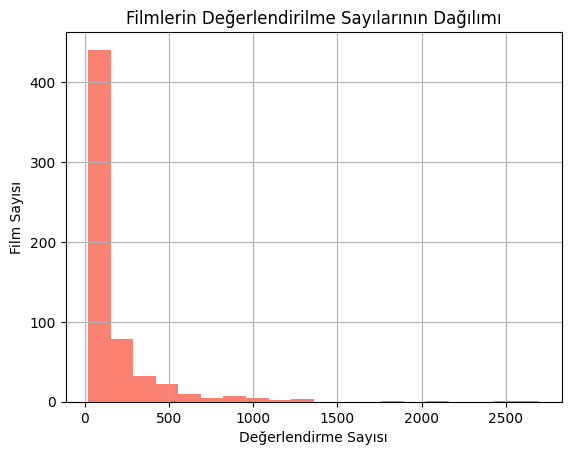

In [88]:
user_analysis['rating_count'].hist(bins=20, color='salmon')
plt.xlabel('Değerlendirme Sayısı')
plt.ylabel('Film Sayısı')
plt.title('Filmlerin Değerlendirilme Sayılarının Dağılımı')
plt.show()

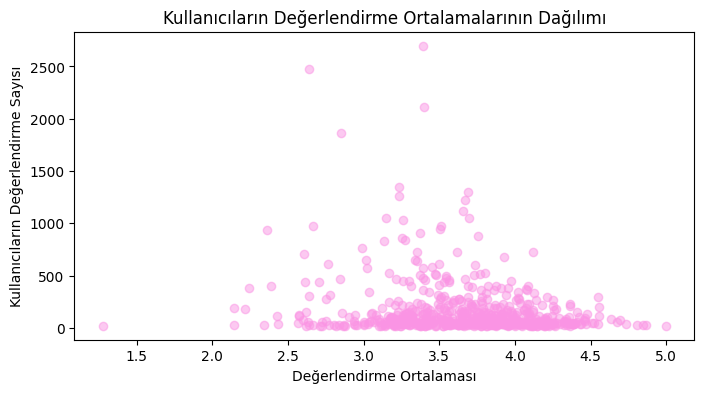

In [89]:
#puanlama arttıkça oy sayısı arttığını burada da görebiliriz
x = user_analysis['avg_rating']
y = user_analysis['rating_count']

plt.figure(figsize=(8, 4))
plt.scatter(x, y, c="#FA94E4", alpha=0.5, marker='o')
plt.xlabel('Değerlendirme Ortalaması')
plt.ylabel('Kullanıcıların Değerlendirme Sayısı')
plt.title('Kullanıcıların Değerlendirme Ortalamalarının Dağılımı')
plt.show()

In [90]:
#her film kaç oy aldı

movie_rating_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_rating_mean = ratings[['movieId','rating']].groupby('movieId').mean()
movie_analysis = movie_rating_count.merge(movie_rating_mean, on='movieId', how='inner')
movie_analysis.rename(columns={'rating_x':'rating_count'}, inplace=True)
movie_analysis.rename(columns={'rating_y':'avg_rating'}, inplace=True)
movie_analysis.sort_values(by=['rating_count'], inplace=True, ascending=False)
movie_analysis.head(5)

,rating_count,avg_rating
movieId,,
356,329,4.164134
318,317,4.429022
296,307,4.197068
593,279,4.161290
2571,278,4.192446


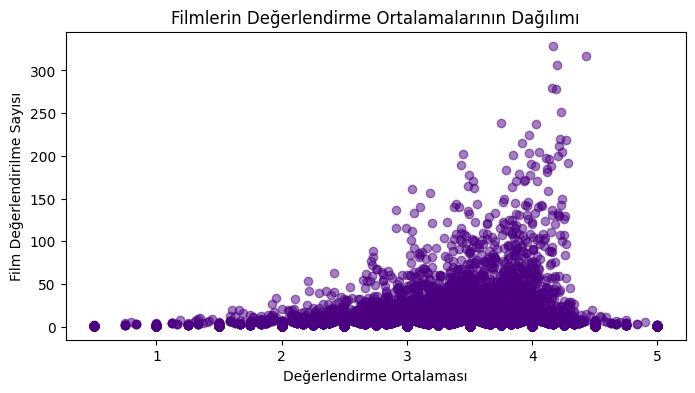

In [91]:
# insanların beğendikleri filme oy verme eğilimi daha yüksek
x = movie_analysis['avg_rating']
y = movie_analysis['rating_count']

plt.figure(figsize=(8, 4))
plt.scatter(x, y, c="indigo", alpha=0.5, marker='o')
plt.xlabel('Değerlendirme Ortalaması')
plt.ylabel('Film Değerlendirilme Sayısı')
plt.title('Filmlerin Değerlendirme Ortalamalarının Dağılımı')
plt.show()

In [92]:
#her oy kaç kere verildi
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


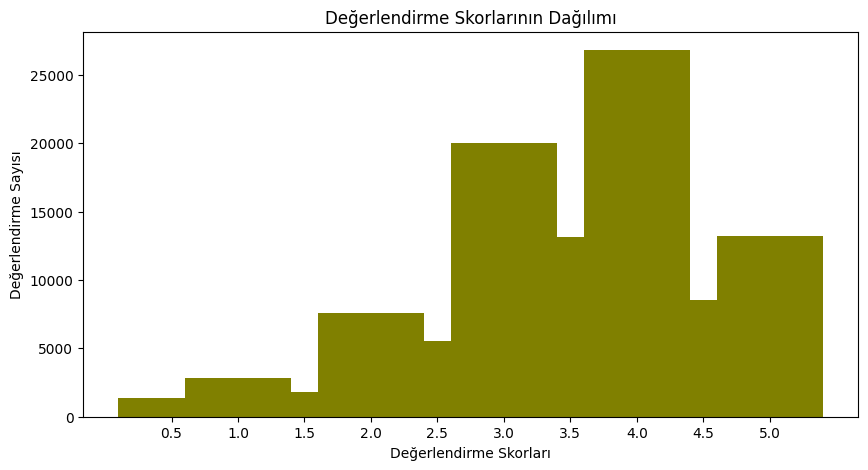

In [93]:
#insanların beğendikleri filme oy verme eğiliminin daha yüksek olduğunu burada da görebiliriz
plt.figure(figsize=(10,5))
plt.bar(ratings_count.index,ratings_count["movieId"], color='olive')
plt.xticks(ratings_count.index)
plt.xlabel('Değerlendirme Skorları')
plt.ylabel('Değerlendirme Sayısı')
plt.title('Değerlendirme Skorlarının Dağılımı')
plt.show()